In [1]:
# import library
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mobile_price.csv")

In [3]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

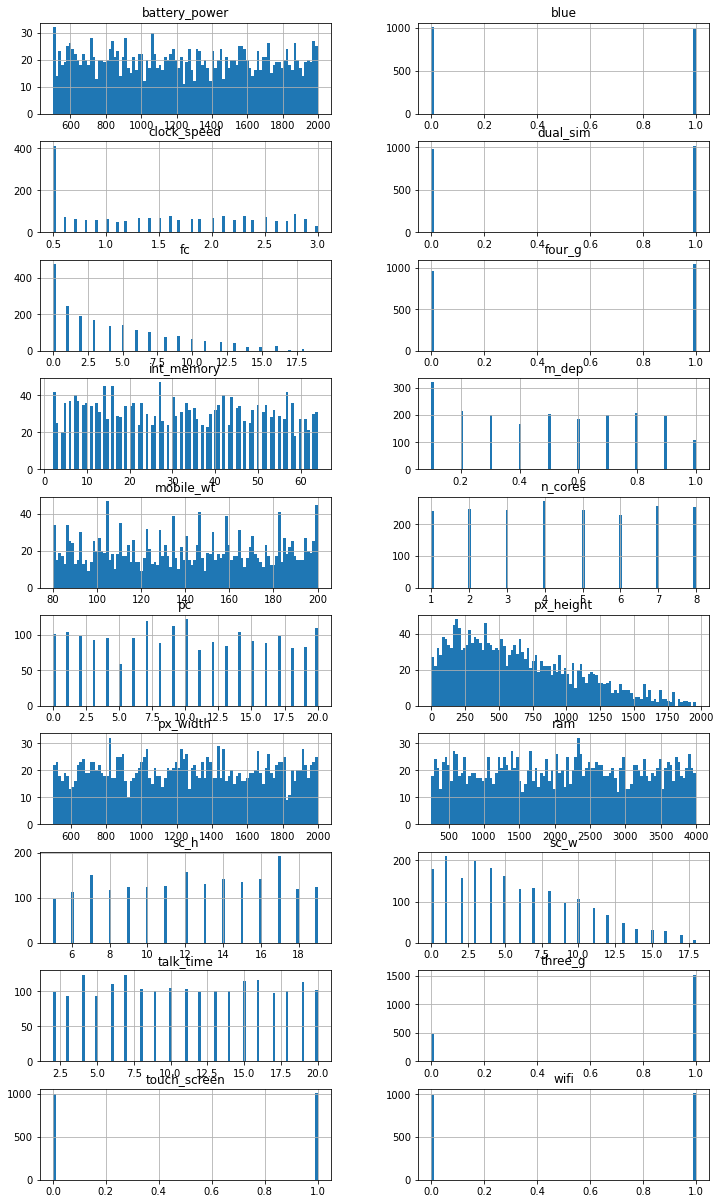

In [8]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [9]:
df.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

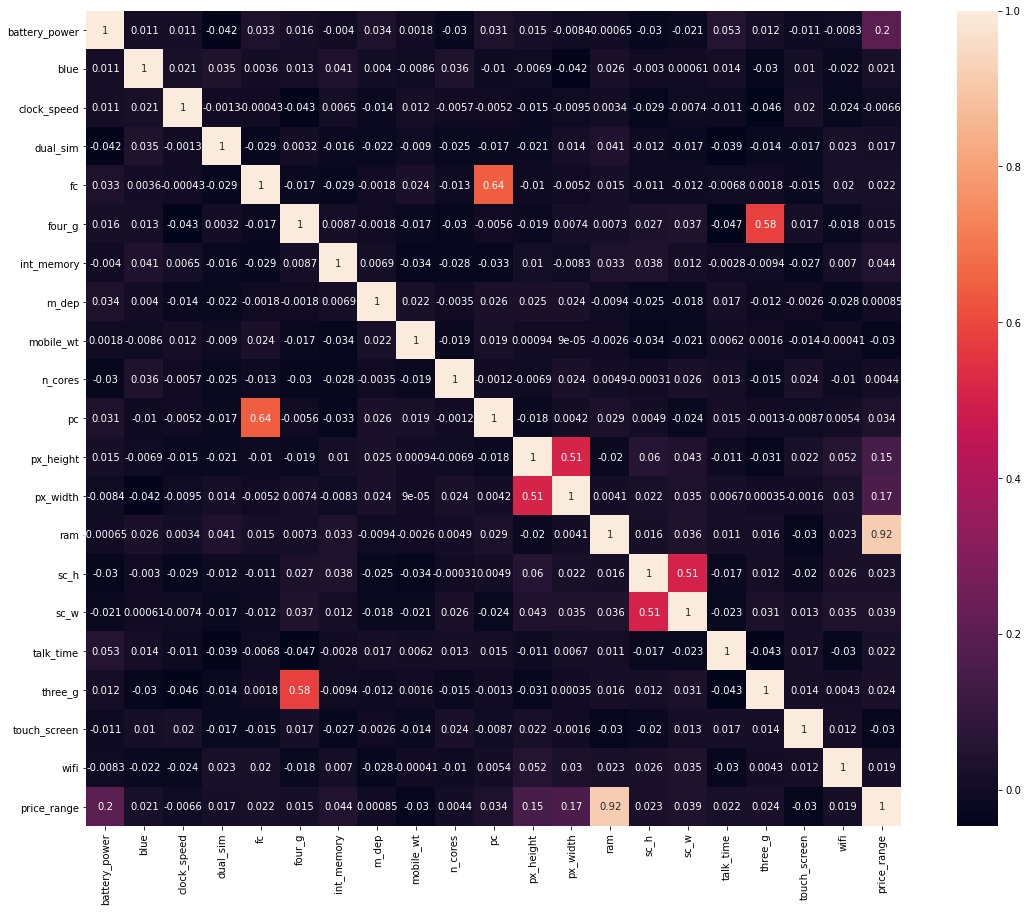

In [10]:
plt.subplots(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [18]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

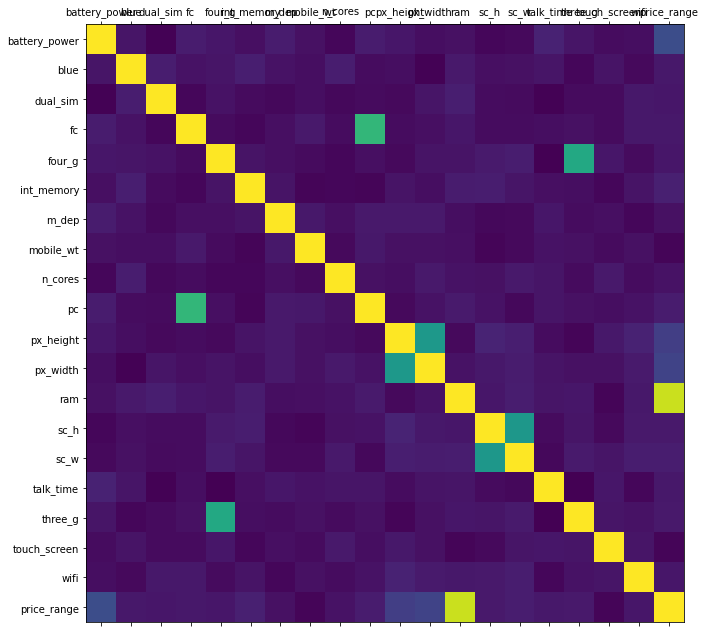

In [19]:
plot_corr(df)

In [14]:
df.drop("clock_speed", axis=1, inplace=True)

In [15]:
df.head()

battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   
2            563     1         1   2       1          41    0.9        145   
3            615     1         0   0       0          10    0.8        131   
4           1821     1         0  13       1          44    0.6        141   

   n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        2   2         20       756  2549     9     7         19        0   
1        3   6        905      1988  2631    17     3          7        1   
2        5   6       1263      1716  2603    11     2          9        1   
3        6   9       1216      1786  2769    16     8         11        1   
4        2  14       1208      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  
0             0     1            1  
1             1     0            2  
2             1     0            2  
3             0     0            2  
4             1     0            1

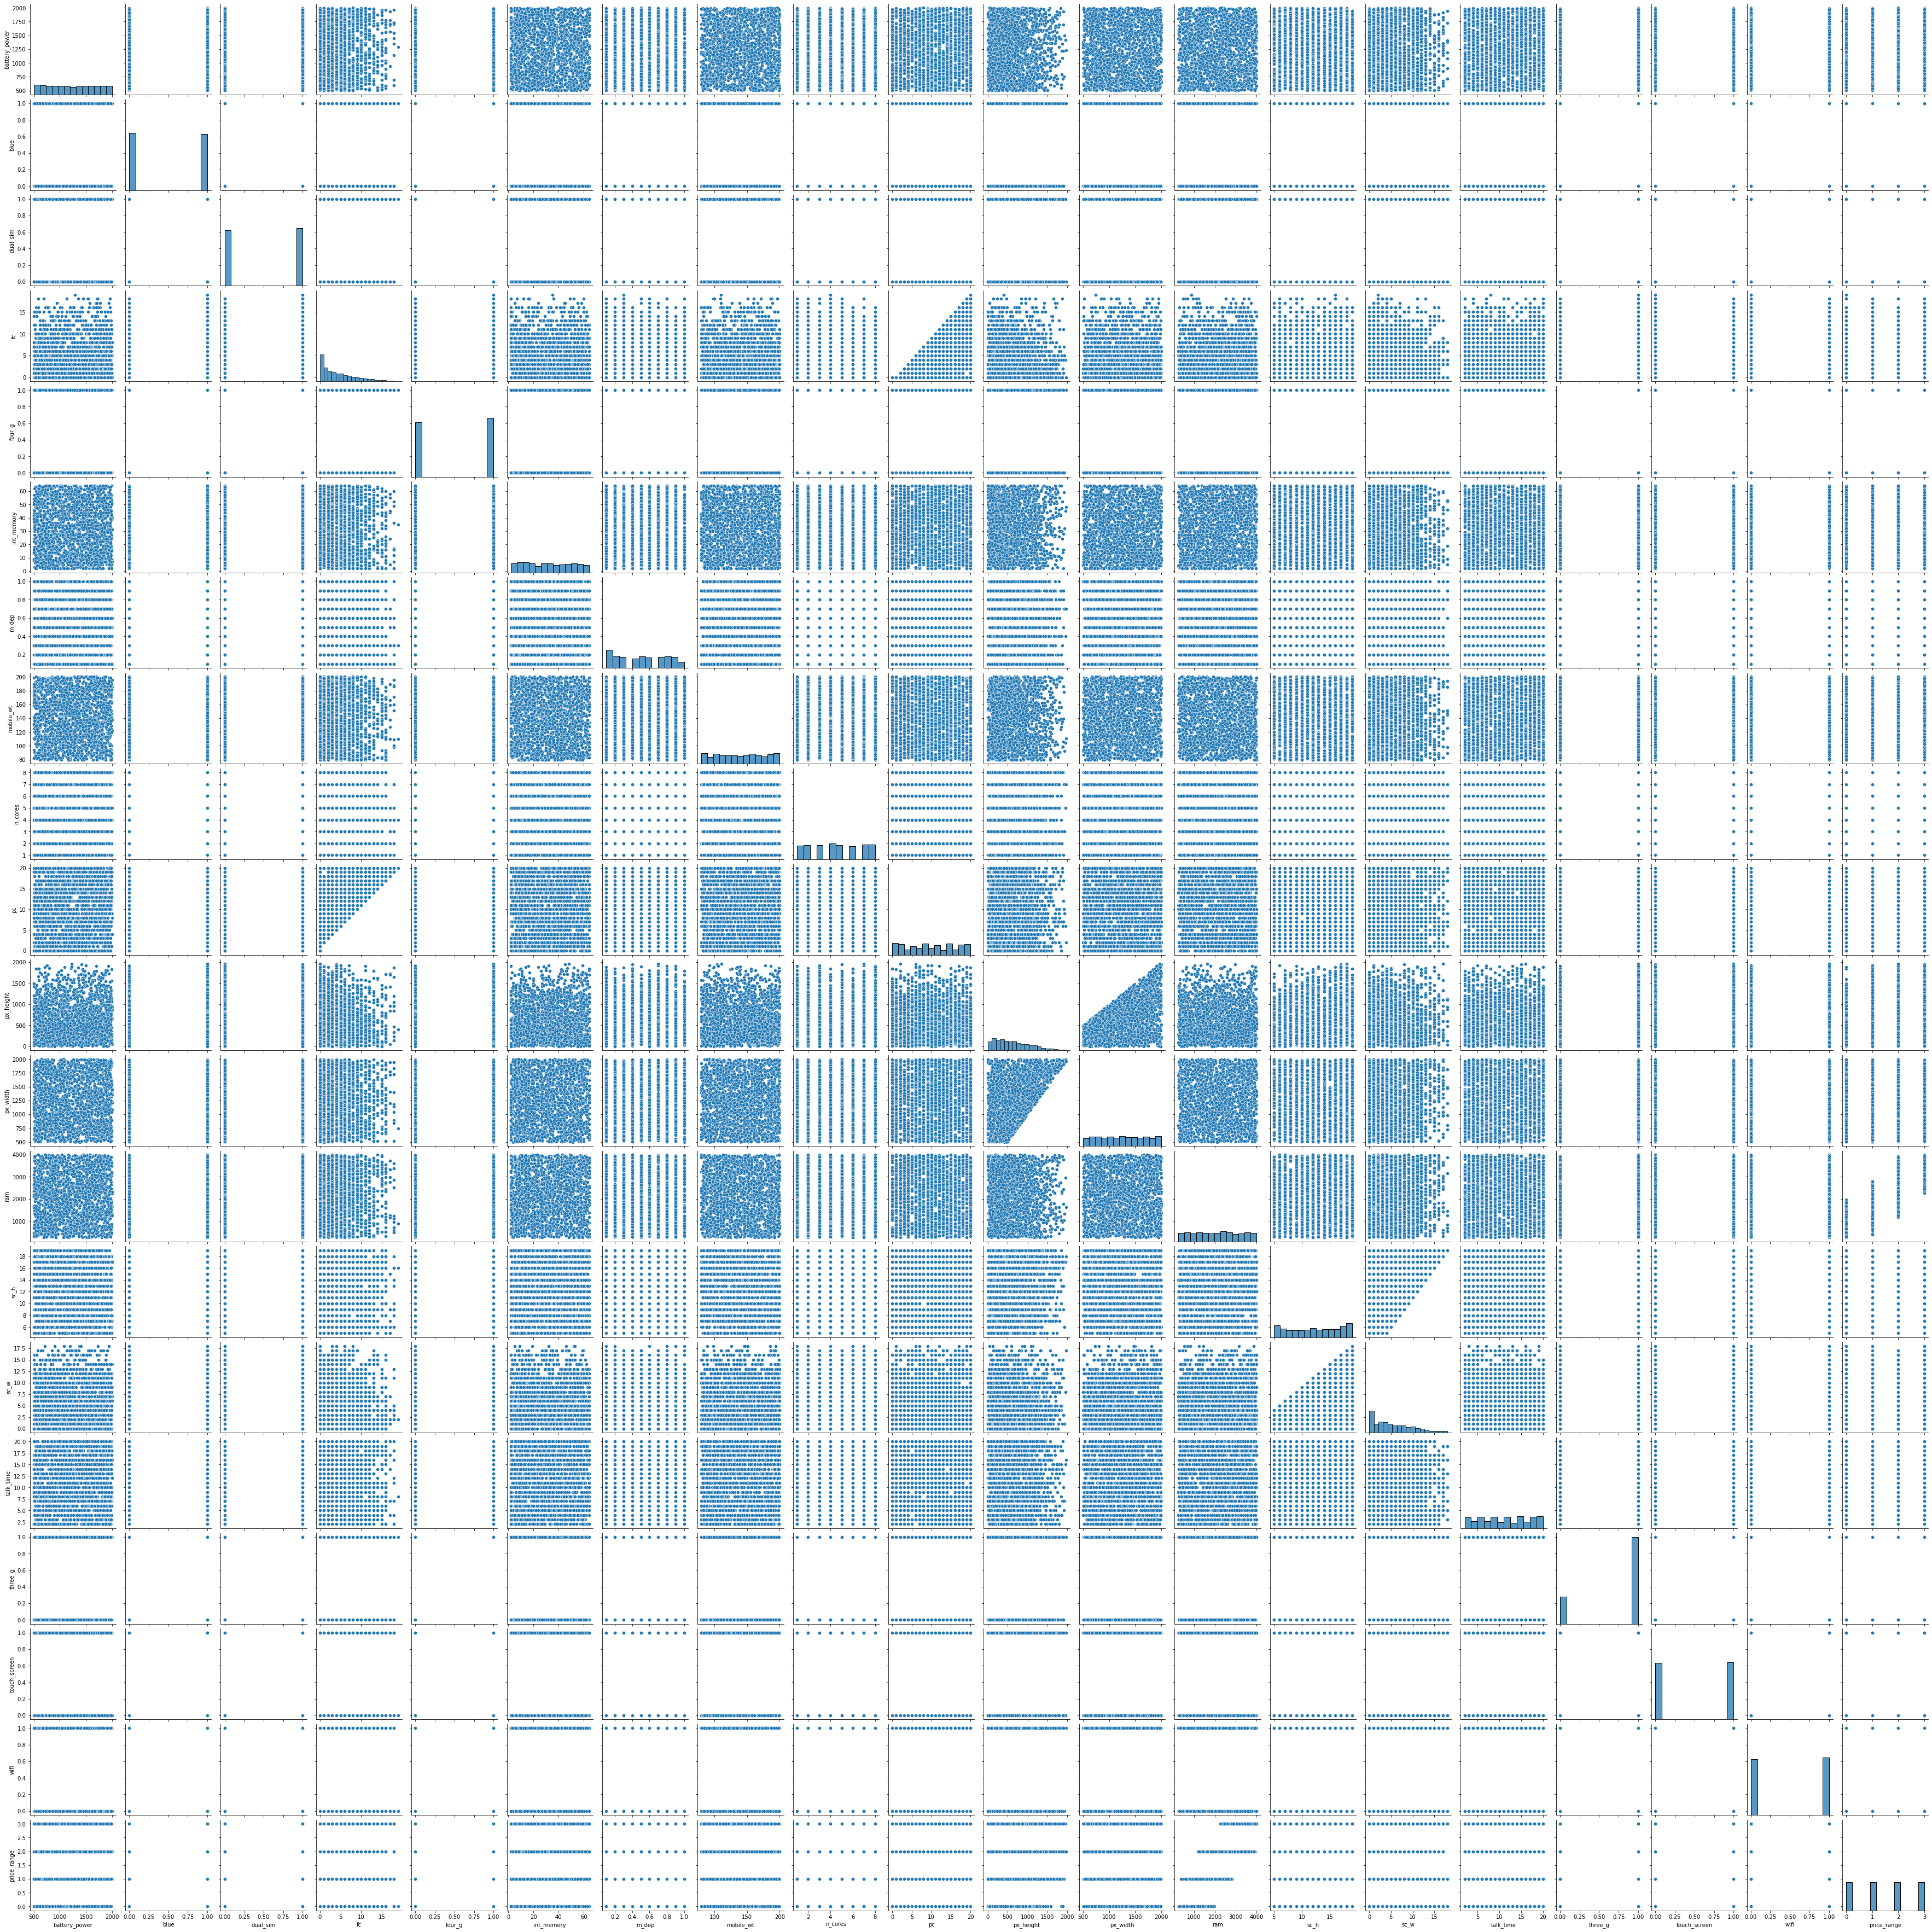

In [16]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('price_range',axis=1)     

Y = df['price_range']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1194           1299     0          2.8         1   2       0          60   
45             1514     0          2.9         0   0       0          27   
1477           1150     1          2.7         0   0       0          39   
1293           1702     0          1.0         0   7       0          36   
1736           1779     1          2.6         1   2       0           5   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1194    0.8        187        8   6       1333      1838  1412    13     1   
45      0.2        118        3   1        186      1810  1152     8     3   
1477    0.4        151        8   1        397       800   999     6     2   
1293    0.1        177        5   9       1240      1931  1430     8     6   
1736    0.8         90        1   3       1225      1717  1246    12     2   

      talk_time  three_g  touch_screen  wifi  
1194         20        0             1     1  
45           20        0             1     1  
1477         11        1             1     0  
1293         10        0             0     0  
1736         20        0             1     0

In [8]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [9]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model = GaussianNB()

model.fit(x_train, y_train.ravel())


GaussianNB()

In [10]:
train_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

Model Accuracy: 0.8229



In [11]:
test_predict = model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))
print()

Model Accuracy: 0.7783



In [12]:
predicted_labels=model.predict(x_test)
model.score(x_test,y_test)

0.7783333333333333

Confusion Matrix


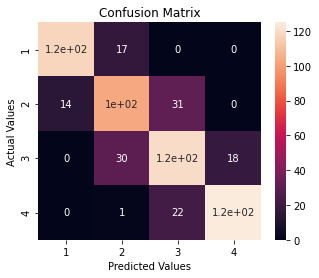

In [13]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)
cm_df = pd.DataFrame(cm,
                     index = ["1","2","3","4"], 
                     columns = ["1","2","3","4"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [14]:
print("Classification Report")
print(metrics.classification_report(y_test, test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.70      0.69       149
           0       0.89      0.87      0.88       135

   micro avg       0.78      0.78      0.78       284
   macro avg       0.79      0.79      0.79       284
weighted avg       0.78      0.78      0.78       284



In [15]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

battery_power          blue   clock_speed      dual_sim            fc  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.128298e-16 -1.927347e-16 -2.172151e-16  3.990142e-16  9.230117e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.678817e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.928904e-01   
25%    -8.804033e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.624947e-01   
50%    -2.849593e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.017032e-01   
75%     8.575560e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.198797e-01   
max     1.728812e+00  1.010051e+00  1.811412e+00  9.811771e-01  3.384628e+00   

             four_g    int_memory         m_dep     mobile_wt       n_cores  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean  -2.048361e-16 -8.754109e-17 -1.045830e-16  1.804112e-16 -4.690692e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.043966e+00 -1.656260e+00 -1.393304e+00 -1.702391e+00 -1.539175e+00   
25%   -1.043966e+00 -8.845346e-01 -1.046495e+00 -8.829695e-01 -6.647678e-01   
50%    9.578860e-01 -2.563229e-03 -6.069151e-03  2.122020e-02 -2.275644e-01   
75%    9.578860e-01  8.794082e-01  1.034357e+00  8.406421e-01  1.084046e+00   
max    9.578860e-01  1.761380e+00  1.727974e+00  1.688320e+00  1.521249e+00   

                 pc     px_height      px_width           ram          sc_h  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.669775e-16  1.287304e-16  5.595524e-17 -1.582068e-16  3.719247e-17   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.635631e+00 -1.454027e+00 -1.739251e+00 -1.722711e+00 -1.734608e+00   
25%   -8.109291e-01 -8.167289e-01 -8.719579e-01 -8.453168e-01 -7.849833e-01   
50%    1.377252e-02 -1.828116e-01 -1.045034e-02  2.055123e-02 -7.276497e-02   
75%    8.384742e-01  6.810064e-01  8.828792e-01  8.670548e-01  8.768595e-01   
max    1.663176e+00  2.963672e+00  1.727608e+00  1.727851e+00  1.589078e+00   

               sc_w     talk_time       three_g  touch_screen          wifi  
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  
mean  -4.085621e-17  1.052491e-16  2.184919e-16  3.065326e-16  4.278800e-16  
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  
min   -1.324131e+00 -1.649584e+00 -1.786861e+00 -1.006018e+00 -1.014099e+00  
25%   -8.649215e-01 -9.173306e-01  5.596406e-01 -1.006018e+00 -1.014099e+00  
50%   -1.761069e-01 -2.013697e-03  5.596406e-01  9.940179e-01  9.860966e-01  
75%    7.423125e-01  9.133032e-01  5.596406e-01  9.940179e-01  9.860966e-01  
max    2.808756e+00  1.645557e+00  5.596406e-01  9.940179e-01  9.860966e-01

In [16]:
x1_train, x1_test, y1_train, y1_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x1_train.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
1194       0.137674 -0.990050     1.566254  0.981177 -0.532099 -1.043966   
45         0.627080 -0.990050     1.688833 -1.019184 -0.992890 -1.043966   
1477      -0.201495  1.010051     1.443675 -1.019184 -0.992890 -1.043966   
1293       1.055026 -0.990050    -0.640169 -1.019184  0.619880 -1.043966   
1736       1.230301  1.010051     1.321096  0.981177 -0.532099 -1.043966   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
1194    1.540887  1.034357   1.320993  1.521249 -0.645989   1.550459   
45     -0.278179 -1.046495  -0.628666 -0.664768 -1.470690  -1.034796   
1477    0.383299 -0.352878   0.303779  1.521249 -1.470690  -0.559218   
1293    0.217930 -1.393304   1.038434  0.209639 -0.151168   1.340844   
1736   -1.490890  1.034357  -1.419832 -1.539175 -1.140810   1.307035   

      px_width       ram      sc_h      sc_w  talk_time   three_g  \
1194  1.357316 -0.656744  0.164641 -1.094526   1.645557 -1.786861   
45    1.292515 -0.896494 -1.022389 -0.635317   1.645557 -1.786861   
1477 -1.044954 -1.037578 -1.497202 -0.864922  -0.002014  0.559641   
1293  1.572548 -0.640146 -1.022389  0.053498  -0.185077 -1.786861   
1736  1.077283 -0.809815 -0.072765 -0.864922   1.645557 -1.786861   

      touch_screen      wifi  
1194      0.994018  0.986097  
45        0.994018  0.986097  
1477      0.994018 -1.014099  
1293     -1.006018 -1.014099  
1736      0.994018 -1.014099

In [17]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model = GaussianNB()

model.fit(x1_train, y1_train.ravel())


GaussianNB()

In [18]:
train_predict1 = model.predict(x1_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y1_train, train_predict1)))
print()

Model Accuracy: 0.8229



In [19]:
test_predict1 = model.predict(x1_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y1_test, test_predict1)))
print()

Model Accuracy: 0.7800

